# Clustering : K-Means : Uber Pickups

This is data of Uber pickups in New York City.  
The data is from this [kaggle competition](https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city).

Sample data looks like this
```
"Date_Time","Lat","Lon","Base"
"4/1/2014 0:11:00",40.769,-73.9549,"B02512"
"4/1/2014 0:17:00",40.7267,-74.0345,"B02512"
"4/1/2014 0:21:00",40.7316,-73.9873,"B02512"
"4/1/2014 0:28:00",40.7588,-73.9776,"B02512"
```

## Step 1: Load the Data
We will also specify schema to reduce loading time

In [33]:
import os
import urllib.request

## sample file with 10,000 records
##data_location="../data/uber-nyc/uber-sample-10k.csv"
##data_url = 'https://elephantscale-public.s3.amazonaws.com/data/uber-nyc/uber-sample-10k.csv'

## larger file with about 500k records
data_location = "../data/uber-nyc/uber-raw-data-apr14.csv.gz"
data_url = 'https://elephantscale-public.s3.amazonaws.com/data/uber-nyc/uber-raw-data-apr14.csv.gz'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)



data_location: uber-raw-data-apr14.csv.gz


In [34]:
import pandas as pd

dataset = pd.read_csv(data_location)
print (dataset.info())
dataset.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date_Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB
None


,Date_Time,Lat,Lon,Base
446499,4/16/2014 18:52:00,40.7523,-73.9784,B02682
557325,4/9/2014 5:52:00,40.7337,-73.9980,B02764
328982,4/1/2014 12:24:00,40.7485,-73.9929,B02682
482361,4/22/2014 15:01:00,40.6755,-73.9980,B02682
456936,4/18/2014 0:35:00,40.7210,-74.0449,B02682
288718,4/21/2014 7:13:00,40.7789,-73.9559,B02617
51875,4/4/2014 14:57:00,40.6784,-73.9678,B02598
548136,4/30/2014 16:37:00,40.7667,-73.9538,B02682
550445,4/30/2014 18:50:00,40.7441,-73.9742,B02682
429419,4/14/2014 10:54:00,40.7658,-73.9762,B02682


## Step 2: Cleanup data
make sure our data is clean

In [35]:
uber_pickups_clean = dataset.dropna(subset=['Lat', 'Lon'])
print ('uber_picksups_clean : ', uber_pickups_clean.shape)

uber_picksups_clean :  (564516, 4)


## Step 3 : Create Feature Vectors

In [36]:
## TODO : create a feature vectors using 'Lat'  and 'Lon'  attributes
x = uber_pickups_clean[['Lat', 'Lon']]
x

,Lat,Lon
0,40.7690,-73.9549
1,40.7267,-74.0345
2,40.7316,-73.9873
3,40.7588,-73.9776
4,40.7594,-73.9722
...,...,...
564511,40.7640,-73.9744
564512,40.7629,-73.9672
564513,40.7443,-73.9889
564514,40.6756,-73.9405


## Step 4 : Run K-Means

In [37]:
%%time 
from sklearn.cluster import KMeans

## TODO : start with num_clusters=4
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)

model = kmeans.fit(x)

wssse = model.inertia_

print ("num_clusters = {},  WSSSE = {:,}".format(num_clusters, wssse))

num_clusters = 4,  WSSSE = 809.5592137545563
CPU times: user 7.09 s, sys: 1.57 s, total: 8.66 s
Wall time: 6.8 s


## Step 5: Let's find the best K - Hyperparameter tuning

Let's try iterating and plotting over values of k, so we can practice using the elbow method.


In [38]:
import time

kvals = []
wssses = []

## TODO : loop over k values from 2 to 10
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    t1 = time.perf_counter()
    model = kmeans.fit(x)
    t2 = time.perf_counter()
    wssse = model.inertia_
    print ("k={},  wssse={},  time took {:,.2f} ms".format(k,wssse, ((t2-t1)*1000)))
    kvals.append(k)
    wssses.append(wssse)

k=2,  wssse=1355.951254638839,  time took 3,605.55 ms
k=3,  wssse=1020.1664209884067,  time took 5,164.01 ms
k=4,  wssse=809.5593794002397,  time took 7,279.53 ms
k=5,  wssse=627.7495638185118,  time took 8,042.69 ms
k=6,  wssse=494.81016251671355,  time took 7,171.57 ms
k=7,  wssse=409.002488731613,  time took 11,041.14 ms
k=8,  wssse=361.07818536420586,  time took 13,043.56 ms
k=9,  wssse=325.32251914889434,  time took 14,690.93 ms
k=10,  wssse=292.33248207127224,  time took 16,888.81 ms
k=11,  wssse=267.4377799798959,  time took 18,262.84 ms
k=12,  wssse=244.274337960301,  time took 26,485.86 ms
k=13,  wssse=223.88822059103515,  time took 21,533.66 ms
k=14,  wssse=212.98369259312295,  time took 25,781.88 ms
k=15,  wssse=200.21664722381163,  time took 22,688.04 ms
k=16,  wssse=186.17839313781334,  time took 24,404.00 ms
k=17,  wssse=177.44776712441436,  time took 34,661.58 ms
k=18,  wssse=166.7897784985189,  time took 38,717.30 ms
k=19,  wssse=160.98410340220144,  time took 36,701.20

In [39]:
import pandas as pd

df = pd.DataFrame({'k': kvals, 'wssse':wssses})
df

,k,wssse
0,2,1355.951255
1,3,1020.166421
2,4,809.559379
3,5,627.749564
4,6,494.810163
5,7,409.002489
6,8,361.078185
7,9,325.322519
8,10,292.332482
9,11,267.437780


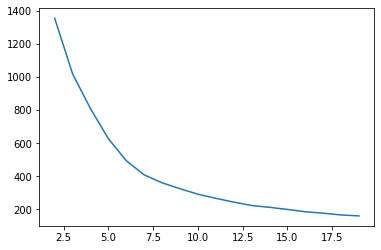

In [40]:
%matplotlib inline
from matplotlib import pyplot

pyplot.plot(kvals, wssses)

## Step 6 : Let's run K-Means with the best K we have choosen
From the graph above, choose a good K value.  We will use that below

In [41]:
%%time 

## TODO : choose an appropriate k
## pick from elbow region from the graph above
num_clusters = 12
kmeans = KMeans(n_clusters=num_clusters)

model = kmeans.fit(x)

wssse = model.inertia_

print ("num_clusters = {},  WSSSE = {:,}".format(num_clusters, wssse))

num_clusters = 12,  WSSSE = 244.25462584473658
CPU times: user 20.4 s, sys: 4.05 s, total: 24.4 s
Wall time: 19.5 s


## Step 7: Predict

In [42]:
predictions = model.predict(x)
predictions

array([ 2,  9,  0, ...,  0, 10, 10], dtype=int32)

In [43]:
uber_pickups_clean['prediction'] = predictions
uber_pickups_clean

,Date_Time,Lat,Lon,Base,prediction
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,9
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,7
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,7
...,...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764,7
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764,7
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764,0
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764,10


### Print Cluster Center and Size

In [44]:
cluster_count = uber_pickups_clean.groupby("prediction").size()
cluster_count

prediction
0     142365
1      13142
2      63717
3       4820
4      29326
5      14604
6        683
7     148949
8        780
9     112035
10     28999
11      5096
dtype: int64

In [45]:
cluster_count.sort_values(ascending=False)

prediction
7     148949
0     142365
9     112035
2      63717
4      29326
10     28999
5      14604
1      13142
11      5096
3       4820
8        780
6        683
dtype: int64

## Step 8 : Ploting time!
We are going to plot the results now.  
Since we are dealing with GEO co-ordinates, let's use Google Maps!  

Go to the following URL :  
[https://jsfiddle.net/sujee/omypetfu/](https://jsfiddle.net/sujee/omypetfu/)

- Run the code cell below
- copy paste the output into Javascript section of the JSFiddle Editor (lower left)
- and click 'Run'  (top nav bar)
- Click on 'tidy' (top nav bar)  to cleanup code

See the following image 

<img src="https://github.com/vgudur/machine-learning-learning-path-labs/blob/patch-3/assets/images/kmeans_uber_trips_map.png?raw=1" style="border: 5px solid grey ; max-width:100%;" />

You will be rewarded with a beautiful map of clusters on Google Maps

<img src="https://github.com/vgudur/machine-learning-learning-path-labs/blob/patch-3/assets/images/Kmeans_uber_trips.png?raw=1" style="border: 5px solid grey ; max-width:100%;" />

Optional
- You can 'fork' the snippet and keep tweaking

In [46]:
### generate Javascript
s1 = "var clusters = {"

s2 = ""

prediction_count = uber_pickups_clean.groupby("prediction").size()
total_count = 0
cluster_centers = model.cluster_centers_
for i in range(0, num_clusters):
    count = prediction_count[i]
    lat = cluster_centers[i][0]
    lng = cluster_centers[i][1]
    total_count = total_count + count
    if (i > 0):
        s2 = s2 + ","
    s2 = s2 + " {}: {{ center: {{ lat: {}, lng: {} }}, count: {} }}".\
        format(i, lat, lng, count)
    #s2 = s2 + "{}: {{  center: {{ }}, }}".format(i)

s3 = s1 + s2 + "};"

s4 = """
function initMap() {
  // Create the map.
  var map = new google.maps.Map(document.getElementById('map'), {
    zoom: 10,
    center: {
      lat: 40.77274573,
      lng: -73.94
    },
    mapTypeId: 'roadmap'
  });

  // Construct the circle for each value in citymap.
  // Note: We scale the area of the circle based on the population.
  for (var cluster in clusters) {
    // Add the circle for this city to the map.
    var cityCircle = new google.maps.Circle({
      strokeColor: '#FF0000',
      strokeOpacity: 0.8,
      strokeWeight: 2,
      fillColor: '#FF0000',
      fillOpacity: 0.35,
      map: map,
      center: clusters[cluster].center,
"""

s5 = "radius: clusters[cluster].count / {} * 100 * 300 }});  }}}}".format(total_count)

# final
s = s3 + s4 + s5

print(s)

var clusters = { 0: { center: { lat: 40.73992246488873, lng: -73.99504767963336 }, count: 142365 }, 1: { center: { lat: 40.651495502967585, lng: -73.78398488814489 }, count: 13142 }, 2: { center: { lat: 40.77981984614177, lng: -73.95898791741895 }, count: 63717 }, 3: { center: { lat: 40.70117632780083, lng: -74.20242912863071 }, count: 4820 }, 4: { center: { lat: 40.671419379317385, lng: -73.97952571885527 }, count: 29326 }, 5: { center: { lat: 40.76566622158313, lng: -73.86709283073131 }, count: 14604 }, 6: { center: { lat: 41.043574377745244, lng: -73.65652781844803 }, count: 683 }, 7: { center: { lat: 40.7593889844632, lng: -73.97895853381539 }, count: 148949 }, 8: { center: { lat: 40.75300884615385, lng: -73.5847058974359 }, count: 780 }, 9: { center: { lat: 40.71907123441397, lng: -74.0028354168151 }, count: 112035 }, 10: { center: { lat: 40.70830562081117, lng: -73.9463459821737 }, count: 28999 }, 11: { center: { lat: 40.86390553924447, lng: -73.91382080642005 }, count: 5096 }};


## Step 9: Let's analyze some more data

- In Step-1 select the data_file to 
```
data_file = "../data/uber-nyc/uber-raw-data-apr14.csv.gz"
```
- And select 'Cell --> Run All'  to execute all code blocks


## Step 10 : Running the script

**Use the download script**

```bash
cd   ~/data/uber-nyc
./download-data.sh
```

This will download more data.

As we run on larger dataset, the execution will take longer and Jupyter notebook might time out.  So let's run this in command line / script mode

```bash

$    cd   ~/ml-labs-python/clustering

$    time  python  kmeans-uber.py 2> logs

```

Watch the output
